In [1]:
from utils import base, visualization, weights
from sklearn.datasets import load_iris
from data import preprocessing
from utils.embedding import EmbedAlgs

/home/jr/.pyenv/versions/3.6.15/envs/gml-final/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)
/home/jr/.pyenv/versions/3.6.15/envs/gml-final/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
iris = load_iris()
data = iris.data
labels = iris.target
data, labels = preprocessing.remove_duplicities(data, labels, shuffle=True)

# Node2Vec

In [3]:
embeddings = base.embed_data(data, EmbedAlgs.node2vec, weight_fun=weights.reciprocal, walk_length=100, num_walks=10)

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


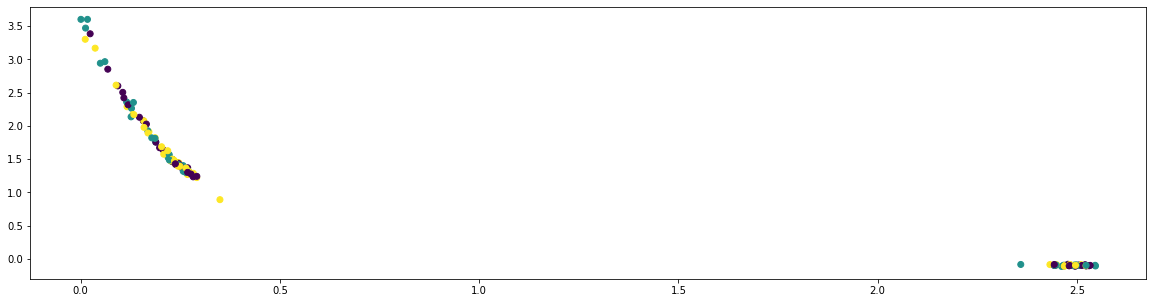

In [4]:
visualization.show_embedding(embeddings, labels=labels, show_numbers=False, aspect='auto')

# Watch your step

In [5]:
embeddings = base.embed_data(data, EmbedAlgs.watchyourstep, weight_fun=weights.reciprocal, num_walks=100, adjacency_powers=10, attention_regularization=0.5, batch_size=12, epochs=100)

/home/jr/.pyenv/versions/3.6.15/envs/gml-final/lib/python3.6/site-packages/stellargraph/core/experimental.py:12: ExperimentalWarning: graph_log_likelihood is experimental: lack of unit tests (see: https://github.com/stellargraph/stellargraph/issues/804). It may be difficult to use and may have major changes at any time.
  # distributed under the License is distributed on an "AS IS" BASIS,


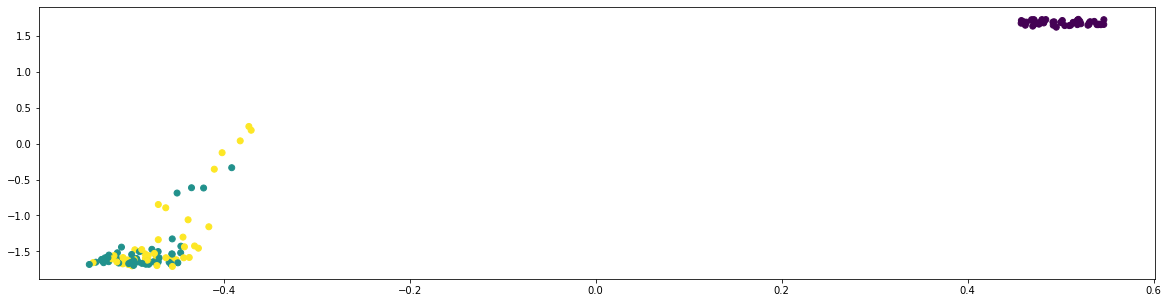

In [6]:
visualization.show_embedding(embeddings, labels=labels, aspect='auto', show_numbers = False)